In [1]:
!git clone https://github.com/caoyunkang/GroundedSAM-zero-shot-anomaly-detection.git

Cloning into 'GroundedSAM-zero-shot-anomaly-detection'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 244 (delta 48), reused 50 (delta 38), pack-reused 177
Receiving objects: 100% (244/244), 44.77 MiB | 44.99 MiB/s, done.
Resolving deltas: 100% (67/67), done.


![](/content/GroundedSAM-zero-shot-anomaly-detection/assets/SegmentAnyAnomaly_logo.png)
# GroundedSAM-zero-shot-anomaly-detection

This project aims to segment any anomaly without any training. We develop this interesting demo by combining [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) and [Segment Anything](https://github.com/facebookresearch/segment-anything)!
Most of the codes are borrowed from [Grounded Segment Anything](https://github.com/IDEA-Research/Grounded-Segment-Anything). Thanks to their excellent work!

**Why this project?**

- [Segment Anything](https://github.com/facebookresearch/segment-anything) is a strong segmentation model. But it need prompts (like boxes/points) to generate masks.
- [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) is a strong zero-shot detector which enable to generate high quality boxes and labels with free-form text.
- The combination of the two models enable to **detect and segment everything** with text inputs!
- In real world industrial inspection applications, models trained with zero or few normal images, is essential in many cases as defects are rare with a wide range of variations.


**How we do?**

We feed the origin image and anomaly specific description to Grouding DINO, and then filter the bouding boxes using several
strategies. Then the filtered bounding boxes are denoted as the prompts in SAM for final anomaly segmentation.
![](/content/GroundedSAM-zero-shot-anomaly-detection/assets/framework.png)


**Imagine Space**

Some possible avenues for future work ...

- Stronger foundation models with segmentation pre-training.
- Collaboration with (Chat-)GPT.
- More advanced normality- and abnormality-specific prompts for better zero-shot anomaly detection performance.

**Examples on the MVTec AD dataset**
![](./assets/demo_results.png)


## : What's New 

- 🆕 Show the way of using anomaly specific prompts to detect anomalies more precise.

[comment]: <> (  <img src="https://github.com/IDEA-Research/Grounded-Segment-Anything/blob/humanFace/assets/interactive-fashion-edit.png" width="500" height="260"/><img src="https://github.com/IDEA-Research/Grounded-Segment-Anything/blob/humanFace/assets/interactive-mark.gif" width="250" height="250"/>)

[comment]: <> (- :new: Checkout our related human-face-edit branch [here]&#40;https://github.com/IDEA-Research/Grounded-Segment-Anything/tree/humanFace&#41;. We'll keep updating this branch with more interesting features. Here are some examples:)

[comment]: <> (  ![]&#40;https://github.com/IDEA-Research/Grounded-Segment-Anything/blob/humanFace/assets/231-hair-edit.png&#41;)

## 🛠 Installation

In [ ]:
#Install Segement Anything
%cd /content/GroundedSAM-zero-shot-anomaly-detection/SAM
!pip install -e .
#Install GroundingDINO
%cd /content/GroundedSAM-zero-shot-anomaly-detection/GroundingDINO
!pip install -e .

#The following optional dependencies are necessary for mask post-processing, saving masks in COCO format, the example notebooks,and exporting the model in ONNX format. 
#jupyter is also required to run the example notebooks.
!pip install opencv-python pycocotools matplotlib onnxruntime onnx ipykernel gradio

## 🏃 Run Grounded-Segment-Anything Demo

In [3]:
#Download the checkpoint for segment-anything and grounding-dino:
%cd /content/GroundedSAM-zero-shot-anomaly-detection
%mkdir weights
%cd ./weights
#SAM model
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
#GroundingDINO model
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
#!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha2/groundingdino_swinb_cogcoor.pth

/content/GroundedSAM-zero-shot-anomaly-detection
/content/GroundedSAM-zero-shot-anomaly-detection/weights
--2023-04-17 04:15:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.141.108, 13.249.141.40, 13.249.141.9, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.141.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   229MB/s    in 10s     

2023-04-17 04:15:23 (235 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

--2023-04-17 04:15:23--  https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 F

In [7]:
!wget https://iiyi2.120askimages.com/forum/2009/01/12/20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg

--2023-04-17 04:23:26--  https://iiyi2.120askimages.com/forum/2009/01/12/20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg
Resolving iiyi2.120askimages.com (iiyi2.120askimages.com)... 157.185.170.144
Connecting to iiyi2.120askimages.com (iiyi2.120askimages.com)|157.185.170.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79130 (77K) [image/jpeg]
Saving to: ‘20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg’

20090112_ce7ae8c18e 100%[===================>]  77.28K  --.-KB/s    in 0.09s   

2023-04-17 04:23:28 (829 KB/s) - ‘20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg’ saved [79130/79130]



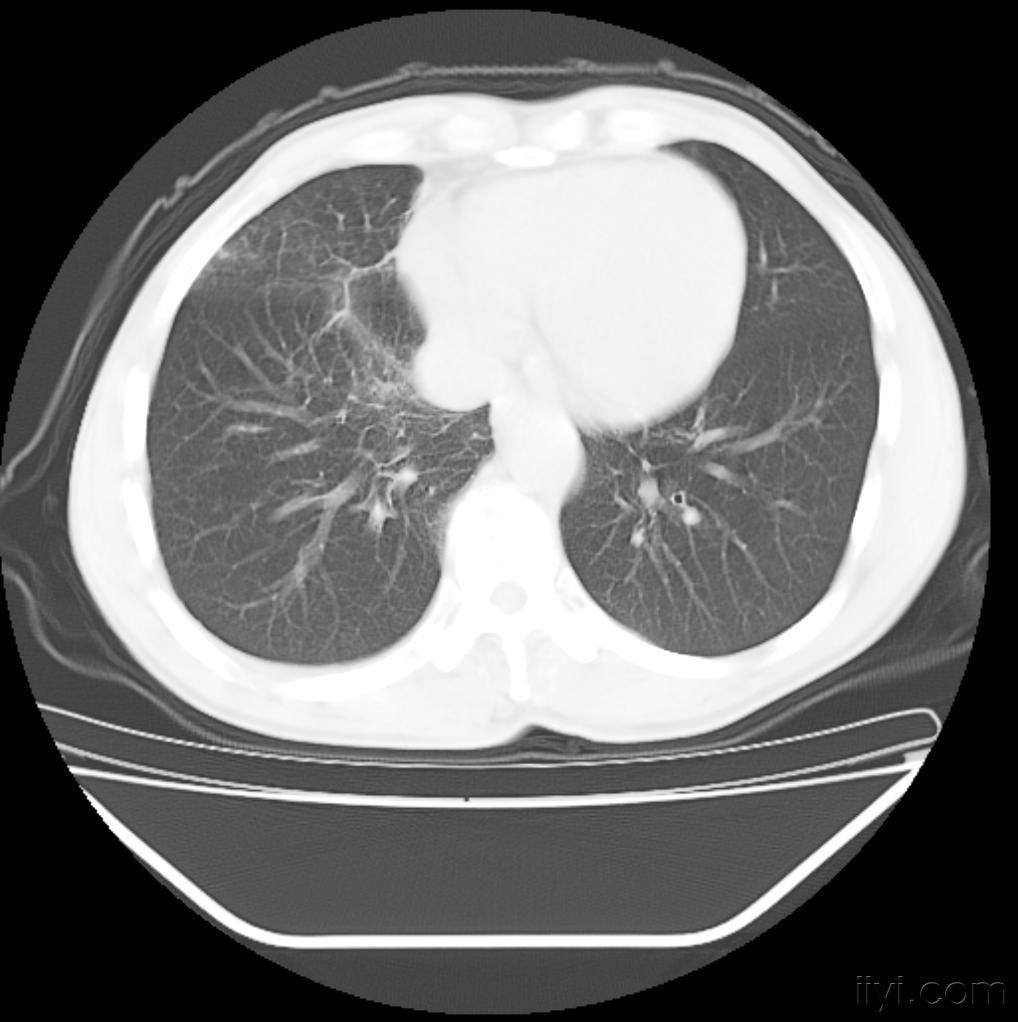

In [8]:
import cv2
from google.colab.patches import cv2_imshow
#image = cv2.imread("/content/GroundedSAM-zero-shot-anomaly-detection/assets/wood_demo.png")
image = cv2.imread("20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg")
cv2_imshow(image)

/content/GroundedSAM-zero-shot-anomaly-detection
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
final text_encoder_type: bert-base-uncased
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a Bert

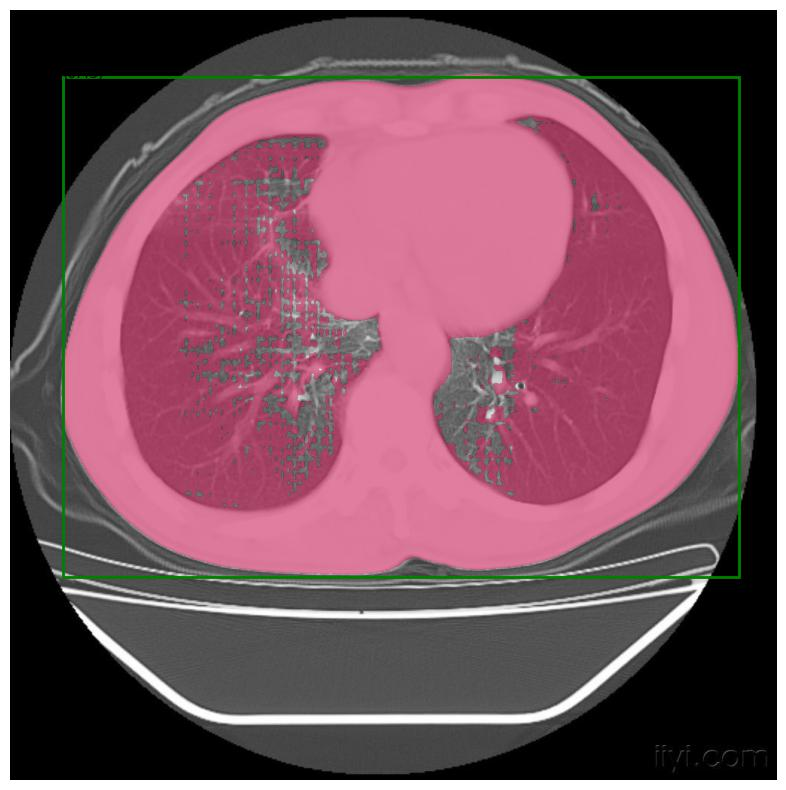

In [11]:
#run demo
!export CUDA_VISIBLE_DEVICES=0
%cd /content/GroundedSAM-zero-shot-anomaly-detection/

!python zero_shot_ad_demo.py \
  --config GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py \
  --grounded_checkpoint weights/groundingdino_swint_ogc.pth \
  --input_image 20090112_ce7ae8c18e21be8e227aL9f0MpVDcYXp.jpg \
  --output_dir "outputs" \
  --box_threshold 0.5 \
  --text_threshold 0.15 \
  --area_threshold 0.70 \
  --text_prompt "Lung" \
  --device "cuda"

output = cv2.imread("/content/GroundedSAM-zero-shot-anomaly-detection/outputs/grounded_sam_output.jpg")
cv2_imshow(output)

In [ ]:
#run Grounded-Segment-Anything + Gradio APP
%cd /content/GroundedSAM-zero-shot-anomaly-detection/
!python gradio_zero_shot_ad_app.py --share